In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from matplotlib import pyplot as plt
import pickle
from basic_vectorizer import TextVectorizer
import pandas as pd


In [2]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [3]:
topic_model = TextVectorizer('count_vectorizer.pkl', 'latent_dirichlet_allocation.pkl')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexzzmtsvv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexzzmtsvv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
topic_model

In [17]:
cluster_list = range(2,10)

def get_optimum_ag_clusters(input_array, cluster_list):
    return_list = []
    for cluster_n in cluster_list:
        temp_dict = {}
        AG = AgglomerativeClustering(n_clusters=cluster_n, affinity='euclidean', memory=None, connectivity=None, compute_distances=True, linkage='ward')
        pred_labels = AG.fit_predict(input_array)
        valcount_series = pd.Series(pred_labels).value_counts()
        temp_dict["cluster_n"] = cluster_n
        temp_dict["cluster_values"] = valcount_series.tolist()

        return_list.append(temp_dict)
    
    return return_list

In [6]:
x = pd.read_csv('profession_labeled.csv').news
x = topic_model.transform(x)

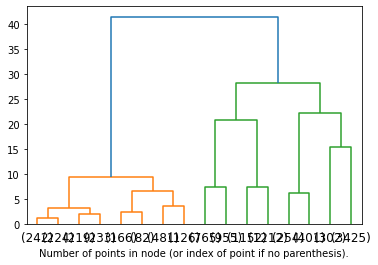

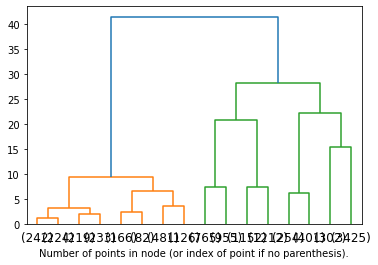

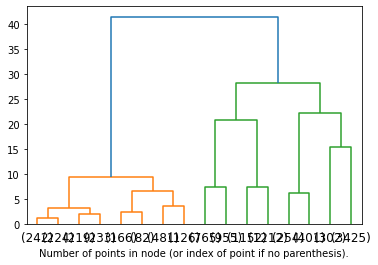

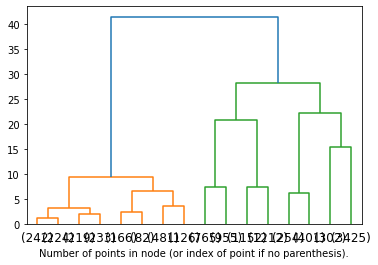

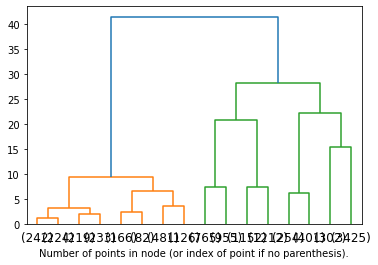

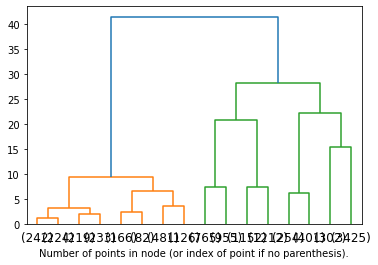

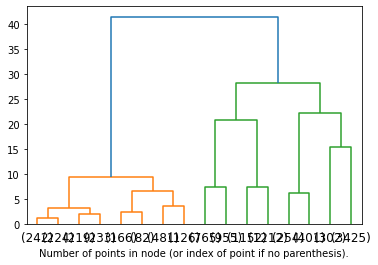

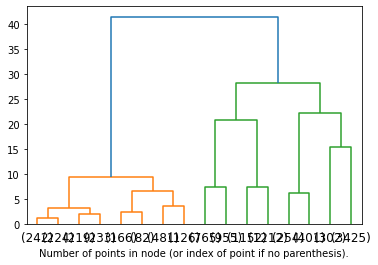

In [19]:
res = get_optimum_ag_clusters(x, cluster_list)

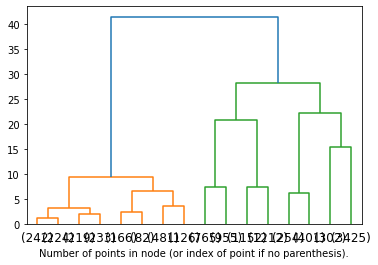

In [20]:
AG = AgglomerativeClustering(n_clusters=5, affinity='euclidean', memory=None, connectivity=None, compute_distances=True, linkage='ward')
AG.fit(x)

plot_dendrogram(AG, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [27]:
with open('agglomerative_clustering.pkl', 'wb') as f:
    pickle.dump(AG, f)